In [7]:
df = pd.read_csv('sales_data_IT.csv')
display(df.head(10))


,Regione,Categoria,Vendite,Costo Marketing,Età Clienti,Visite,Margine
0,Nord,Giochi,9762.35,6479.16,25.2,198,0.308
1,Sud,Tech,2920.33,3175.94,41.7,112,0.329
2,Centro,Tech,5066.12,3311.78,55.7,157,0.354
3,Centro,Food,5270.64,2725.43,43.8,143,0.166
4,Nord,Giochi,8841.43,7058.69,18.0,208,0.267
5,Nord,Tech,7357.78,5047.37,45.9,223,0.338
6,Nord,Giochi,9741.65,5011.14,22.4,232,0.287
7,Sud,Giochi,3042.92,2485.52,28.4,113,0.266
8,Centro,Tech,7155.10,3638.66,41.0,173,0.400
9,Centro,Giochi,3833.90,3398.95,24.5,121,0.253


In [8]:
df.tail(10)

,Regione,Categoria,Vendite,Costo Marketing,Età Clienti,Visite,Margine
140,Sud,Tech,3902.77,2757.77,52.3,88,0.299
141,Nord,Tech,8632.73,5166.15,49.8,214,0.385
142,Centro,Giochi,5979.89,3690.11,33.6,144,0.300
143,Nord,Food,4784.27,3978.60,35.4,201,0.177
144,Nord,Tech,5963.22,4135.15,49.4,194,0.424
145,Nord,Food,8585.95,5842.52,41.1,210,0.148
146,Centro,Giochi,4274.22,3472.31,33.8,139,0.234
147,Centro,Tech,6055.39,3977.05,41.0,135,0.322
148,Nord,Food,9349.11,5022.65,35.0,200,0.179
149,Nord,Tech,9354.21,5023.80,42.0,223,0.360


In [9]:
df.describe().round(2)

,Vendite,Costo Marketing,Età Clienti,Visite,Margine
count,150.00,150.00,150.00,150.00,150.00
mean,6157.32,3933.38,36.59,160.90,0.27
std,1885.28,1241.61,9.98,40.69,0.08
min,2391.11,1503.42,18.00,88.00,0.13
25%,4767.78,2842.80,27.12,122.75,0.20
50%,6279.32,3988.14,39.50,161.00,0.28
75%,7655.77,4804.81,44.30,198.00,0.33
max,10164.89,7105.91,55.70,233.00,0.44


In [10]:
import pandas as pd
import numpy as np

def kpi_table(df, cols=None):
    if cols is None:
        cols = df.select_dtypes(include=np.number).columns

    # Quantili utili
    q1 = df[cols].quantile(0.25)
    q3 = df[cols].quantile(0.75)
    iqr = q3 - q1

    # Base KPI (built-in)
    base = df[cols].agg(['count','mean','median','std','min','max','sum','skew','kurt'])

    # Extra KPI
    extra = pd.DataFrame({
        'missing_%': df[cols].isna().mean()*100,
        'q1': q1,
        'q3': q3,
        'IQR': iqr,
        'range': df[cols].max() - df[cols].min(),
        'CV': (df[cols].std()/df[cols].mean()).replace([np.inf, -np.inf], np.nan),
        'CV_%': (df[cols].std()/df[cols].mean()*100).replace([np.inf, -np.inf], np.nan)
    }).T  # righe = KPI

    # Unisci e ordina le righe in modo leggibile
    kpi = pd.concat([base, extra], axis=0)
    order = ['count','mean','median','std', 'CV', 'CV_%','min','q1','q3','IQR','max','range']
    kpi = kpi.reindex(order)
    return kpi.round(2)

In [12]:
kpi = kpi_table(df, cols=['Vendite', 'Costo Marketing', 'Età Clienti', 'Visite', 'Margine'])
print(kpi)

         Vendite  Costo Marketing  Età Clienti  Visite  Margine
count     150.00           150.00       150.00  150.00   150.00
mean     6157.32          3933.38        36.59  160.90     0.27
median   6279.32          3988.14        39.50  161.00     0.28
std      1885.28          1241.61         9.98   40.69     0.08
CV          0.31             0.32         0.27    0.25     0.28
CV_%       30.62            31.57        27.27   25.29    28.17
min      2391.11          1503.42        18.00   88.00     0.13
q1       4767.78          2842.80        27.12  122.75     0.20
q3       7655.77          4804.81        44.30  198.00     0.33
IQR      2887.98          1962.00        17.17   75.25     0.13
max     10164.89          7105.91        55.70  233.00     0.44
range    7773.78          5602.49        37.70  145.00     0.30


In [13]:
kpi_regione= df.groupby("Regione").agg({
    "Vendite": ["mean", "median"],
    "Margine": "mean",
    "Visite": "mean"
}).round(2)

print("=== KPI per REGIONE ===")
print(kpi_regione)

kpi_categoria = df.groupby("Categoria").agg({
    "Vendite": ["mean", "median"],
    "Margine": "mean",
    "Visite": "mean"
    }).round(2)

print()
print("=== KPI per CATEGORIA ===")
print(kpi_categoria)

print()
print("=== KPI per REGIONE ===")
display(kpi_regione.style.format("{:.2f}").background_gradient(cmap="Blues").set_caption("KPI per Regione"))

print()
print("=== KPI per CATEGORIA ===")
display(kpi_categoria.style.format("{:.2f}").background_gradient(cmap="Greens").set_caption("KPI per Categoria"))

=== KPI per REGIONE ===
         Vendite          Margine  Visite
            mean   median    mean    mean
Regione                                  
Centro   5824.40  5638.78    0.27  146.93
Nord     7655.93  7674.71    0.28  199.38
Sud      3812.90  3595.94    0.27  106.84

=== KPI per CATEGORIA ===
           Vendite          Margine  Visite
              mean   median    mean    mean
Categoria                                  
Food       6043.16  5755.86    0.18  158.20
Giochi     6127.74  6073.55    0.28  160.47
Tech       6312.14  6553.35    0.36  164.26

=== KPI per REGIONE ===



=== KPI per CATEGORIA ===


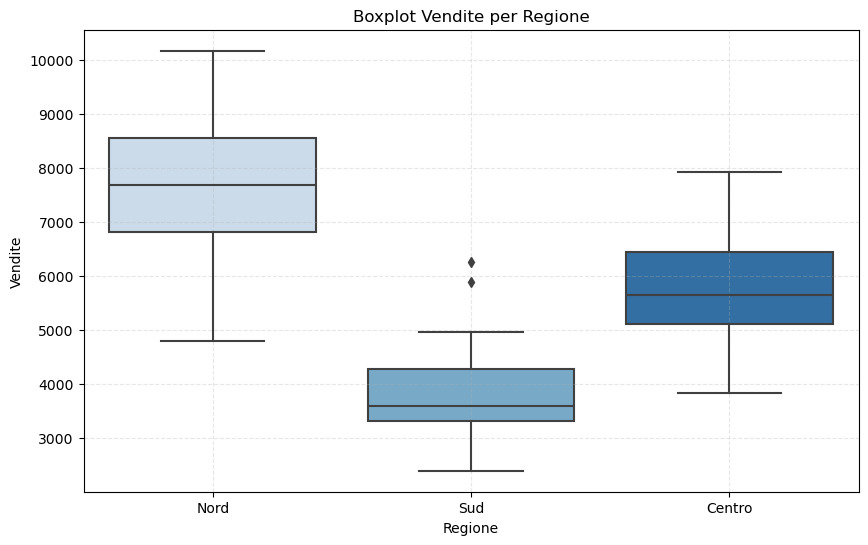

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="Regione", y="Vendite", palette="Blues")
plt.title("Boxplot Vendite per Regione")
plt.xlabel("Regione")
plt.ylabel("Vendite")
plt.grid(True, linestyle="--", alpha=0.3)
plt.show()

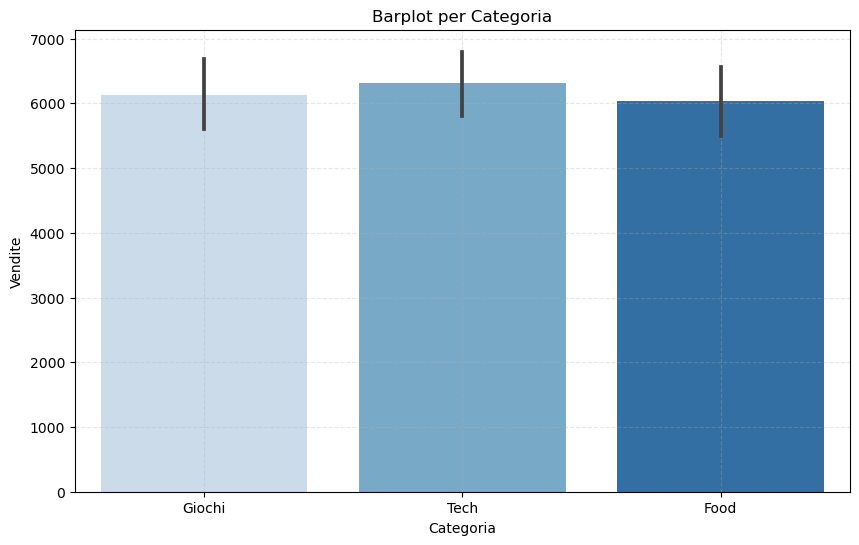

In [15]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x="Categoria", y="Vendite", palette="Blues")
plt.title("Barplot per Categoria")
plt.xlabel("Categoria")
plt.ylabel("Vendite")
plt.grid(True, linestyle="--", alpha=0.3)
plt.show()

<Figure size 1000x600 with 0 Axes>

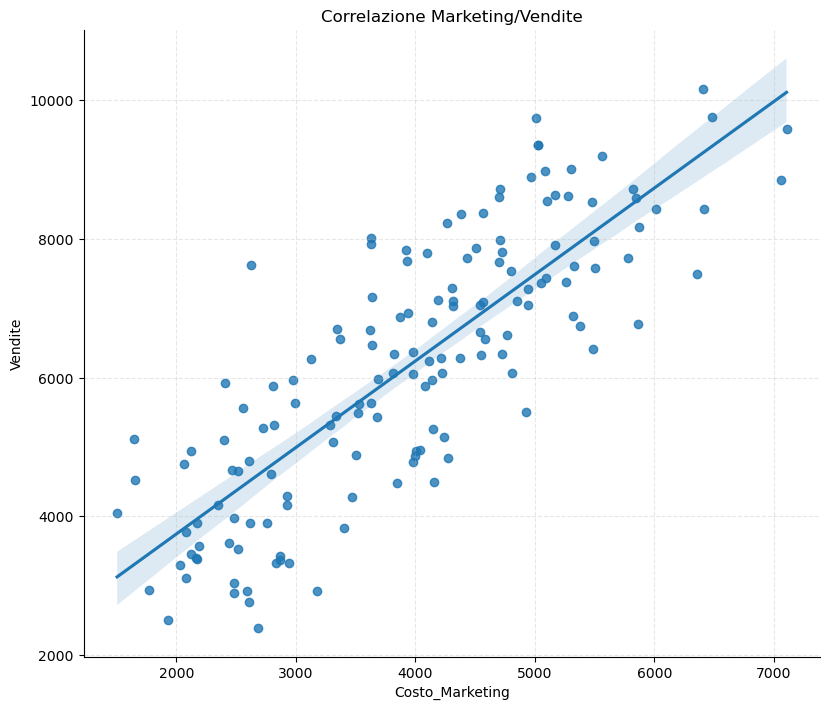

In [17]:
plt.figure(figsize=(10,6))
sns.lmplot(data=df, x="Costo Marketing", y="Vendite", height=7, aspect=1.2, palette="Blues")
plt.title("Correlazione Marketing/Vendite")
plt.xlabel("Costo_Marketing")
plt.ylabel("Vendite")
plt.grid(True, linestyle="--", alpha=0.3)
plt.show()

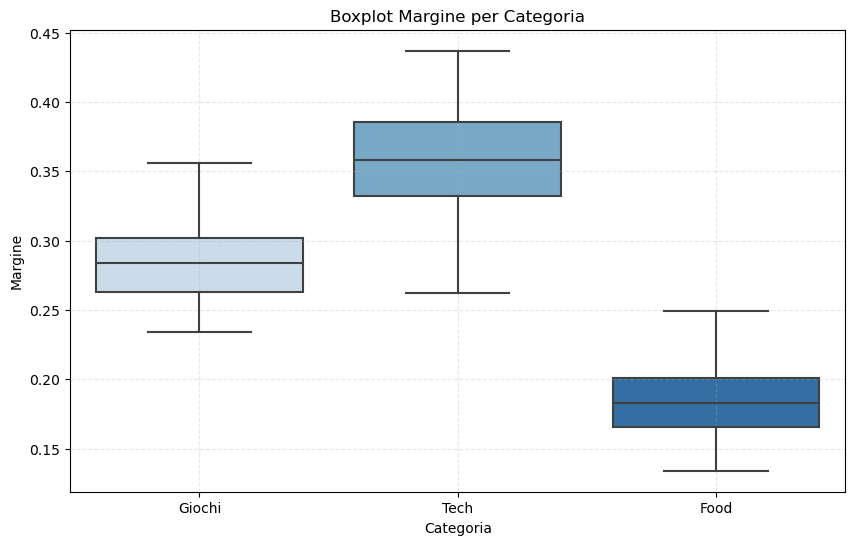

In [18]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="Categoria", y="Margine", palette="Blues")
plt.title("Boxplot Margine per Categoria")
plt.xlabel("Categoria")
plt.ylabel("Margine")
plt.grid(True, linestyle="--", alpha=0.3)
plt.show()

In [20]:
corr_value = df["Costo Marketing"].corr(df["Vendite"])
print(f"Coefficiente di Correlazione Marketing/Vendite: {corr_value:.2f}")

Coefficiente di Correlazione Marketing/Vendite: 0.82


In [21]:
kpi_regione = df.groupby("Regione").agg(
    Vendite_Mean=("Vendite","mean"),
    Vendite_Median=("Vendite","median"),
    Margine_Mean=("Margine","mean"),
    Visite_Mean=("Visite","mean")
).round(2)

In [22]:
kpi_regione= df.groupby("Regione").agg({
    "Vendite": ["mean", "median"],
    "Margine": "mean",
    "Visite": "mean"
}).round(2)

print("=== KPI per REGIONE ===")
print(kpi_regione)

kpi_regione = df.groupby("Regione").agg(
    Vendite_Mean=("Vendite","mean"),
    Vendite_Median=("Vendite","median"),
    Margine_Mean=("Margine","mean"),
    Visite_Mean=("Visite","mean")
).round(2)

kpi_categoria=df.groupby("Categoria").agg({
    "Vendite": ["mean", "median"],
    "Margine": "mean",
    "Visite": "mean"
    }).round(2)

print()
print("=== KPI per CATEGORIA ===")
print(kpi_categoria)

print()
print("=== KPI per REGIONE ===")
display(kpi_regione.style.format("{:.2f}").background_gradient(cmap="Blues").set_caption("KPI per Regione"))

print()
print("=== KPI per CATEGORIA ===")
display(kpi_categoria.style.format("{:.2f}").background_gradient(cmap="Greens").set_caption("KPI per Categoria"))

=== KPI per REGIONE ===
         Vendite          Margine  Visite
            mean   median    mean    mean
Regione                                  
Centro   5824.40  5638.78    0.27  146.93
Nord     7655.93  7674.71    0.28  199.38
Sud      3812.90  3595.94    0.27  106.84

=== KPI per CATEGORIA ===
           Vendite          Margine  Visite
              mean   median    mean    mean
Categoria                                  
Food       6043.16  5755.86    0.18  158.20
Giochi     6127.74  6073.55    0.28  160.47
Tech       6312.14  6553.35    0.36  164.26

=== KPI per REGIONE ===


,Vendite_Mean,Vendite_Median,Margine_Mean,Visite_Mean
Regione,,,,
Centro,5824.40,5638.78,0.27,146.93
Nord,7655.93,7674.71,0.28,199.38
Sud,3812.90,3595.94,0.27,106.84



=== KPI per CATEGORIA ===
